<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px; width: 180px">
            <img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo">
        </td>
        <td style="width: 100%">
            <div style="width: 100%; text-align:right"><font style="font-size:38px"><b>Softwaredesign</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b> </b></font></div>
        </td>
    </tr>
</table>

# Glättung einer Beschleunigungs-Zeitreihe

Gegeben ist ein Datensatz mit Beschleunigungsdaten. Diese werden eingelesen, in ein geeignetes Format für weitere Berechnungen umgewandelt und visualisiert. Anschließend wird eine Glättung der Daten durchgeführt und der Mean Squared Error ($MSE$) berechnet.

<img src="keyboard.jpg" width=75%>

In [19]:
# Es werden weitere Bibliotheken wie numpy und matplotlib benötigt, diese werden in den folgenden Einheiten genauer behandelt.
# %pip install <package> installiert ein Paket in der aktuellen Umgebung automatisch, wie dies genau funktioniert wird in einer späteren Einheit genau geklärt.
%pip install numpy
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Laden der Daten aus der bereitgestellten CSV-Datei

Im folgenden Datenset befindet sich die Aufzeichnung eines triaxialen Beschleunigungssensors. Die Daten enthalten sowohl den Messzeitpunkt in Sekunden, als auch die Beschleunigung in die drei Koordinatenrichtungen $a_x$, $a_y$ und $a_z$.

In [21]:
# Einlesen der Daten mit numpy (wird in einer späteren Einheit vertieft)
data = np.loadtxt("keyboard_clean.csv", delimiter=",", skiprows=1, dtype=str)

time_str = data[:, 0].tolist()
acc_x_str = data[:, 1].tolist()
acc_y_str = data[:, 2].tolist()
acc_z_str = data[:, 3].tolist()

#### Umwandeln der Daten von String zu Float

Offensichtlich wurden die Daten als Zeichenkette geladen, was die Weiterverarbeitung und Auswertung erschwert. Wandeln Sie den Inhalt aller Listen in einen numerischen Datentyp um (`float`). Auch, wenn wir später elegantere Arten der Umwandlung kennenlernen werden. Nutzen Sie nun einen `for`-loop und speichern Sie das Ergebnis in `time`, `acc_x`, `acc_y` und `acc_z`.

In [22]:
time_str[0:5]

['0.0', '1.0', '1.8', '3.0', '4.0']

In [23]:
time = []
acc_x = []
acc_y = []
acc_z = []

#Lösung hier einfügen:

for time_value in time_str:
    time_float = float(time_value)
    time.append (time_float)


for x_value in acc_x_str:
    x_float = float(x_value)
    acc_x.append (x_float)

for y_value in acc_y_str:
    y_float = float(y_value)
    acc_y.append (y_float)


for z_value in acc_z_str:
    z_float = float(z_value)
    acc_z.append (z_float)



In [24]:
#Test ob die Umwandlung funktioniert hat
print(time[0:5])
print(type(time[0]))

print(acc_x[0:5])
print(type(acc_x[0]))

print(acc_y[0:5])
print(type(acc_y[0]))

print(acc_z[0:5])
print(type(acc_z[0]))


[0.0, 1.0, 1.8, 3.0, 4.0]
<class 'float'>
[0.666852, 0.549172, 0.627625, 0.588399, 0.588399]
<class 'float'>
[-4.66796, -4.55029, -4.66796, -4.62874, -4.66796]
<class 'float'>
[9.84587, 9.76742, 9.92433, 9.8851, 10.042]
<class 'float'>


## Erste Visualisierung der Daten

Oft hilft es sich zunächst einen Überblick über die Daten zu verschaffen. Wie die Plot-Funktionen von `matplotlib` funktionieren, werden wir in einer späteren Einheit kennenlernen.

Sofern alle Variablen wie oben benannt wurden, sollte hier ein einfacher Plot der Beschleunigungsdaten entstehen.

Mit Hilfe dieser Visualisierung kann auch überprüft werden, in welchen Einheiten die Messdaten vorliegen. 

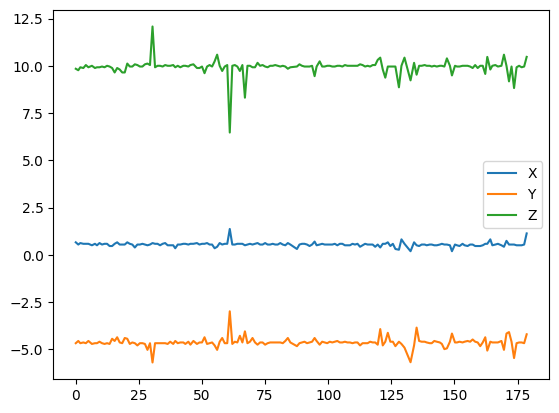

In [25]:
fig, ax = plt.subplots()        
ax.plot(time, acc_x, label="X") 
ax.plot(time, acc_y, label="Y")
ax.plot(time, acc_z, label="Z")
ax.legend()                     

### Bestimmen und Visualisiern der resultierenden Beschleunigung

Die resultierende Beschleunigung $a$ ergibt sich aus der Wurzel der Summe der quadrierten Beschleunigungen in den drei Richtungen:

$a = \sqrt{a_x^2 + a_y^2 + a_z^2}$

Diese soll in der Liste `acc` gespeichert werden und wird anschließend ebenfalls visualisiert.
Um die Quadratwurzel zu berechnen, können Sie die Funktion `math.sqrt()` aus dem Modul `math` verwenden.

In [26]:
import math

acc = []
for i in range(len(acc_x)):
    acc.append(math.sqrt(acc_x[i]**2 + acc_y[i]**2 + acc_z[i]**2))


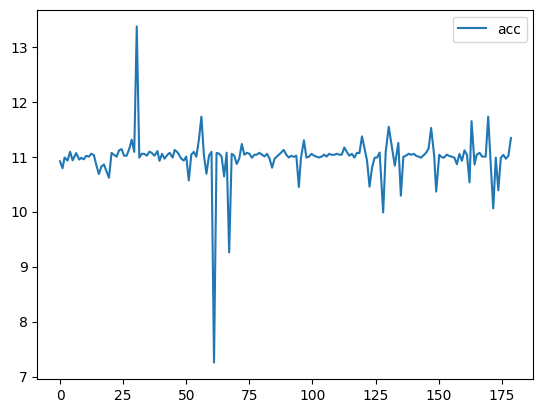

In [27]:
#Plotten der Lösung
fig, ax = plt.subplots()
ax.plot(time, acc, label="acc")
ax.legend()

### Bestimmen des Mittelwertes

Es soll weiters für alle drei Raumrichtungen der Mittelwert der jeweiligen Beschleunigung über die Zeit bestimmt werden.

$\overline{a} = \frac{1}{n} \sum_{i=0}^n a_{i}$

Diese sollen in den Variablen `acc_x_mean`, `acc_y_mean` und `acc_z_mean` gespeichert werden.

In [28]:
acc_x_mean = 0
acc_y_mean = 0
acc_z_mean = 0

#Lösung hier einfügen:

acc_x_mean = sum(acc_x) / len(acc_x)
acc_y_mean = sum(acc_y) / len(acc_y)
acc_z_mean = sum(acc_z) / len(acc_z)




In [29]:
#Ausgabe der Lösung
print(f"acc_x_mean = {acc_x_mean:.2f} ms^-2")
print(f"acc_y_mean = {acc_y_mean:.2f} ms^-2")
print(f"acc_z_mean = {acc_z_mean:.2f} ms^-2")

acc_x_mean = 0.55 ms^-2
acc_y_mean = -4.62 ms^-2
acc_z_mean = 9.94 ms^-2


## Glätten der Daten mittels Gleitendem Durchschnitt

Erstellen Sie eine neue Listen `mov_5_acc_x`, `mov_5_acc_y`, und `mov_5_acc_z`, welche zu den Zeitpunkt den [gleich-gewichteten gleitenden Durchschnitt](https://de.wikipedia.org/wiki/Gleitender_Mittelwert) des **aktuellen und der vier vorherigen Werte** bildet. Achten Sie darauf, dass auch für die ersten Elemente ein Durchschnitt aller verfügbarer Elemente gebildet wird.

Sie werden feststellen, dass für alle 3 Listen der gleiche Programmcode zum Bestimmen desn gleitenden Mittelwerts ausgeführt werden muss. Dies ist ein Hinweis darauf, dass in einem echten Projekt eine Funktion implementiert werden sollte, die den gleitenden Mittelwert berechnet. Wie Funktionen in `Python` erstellt werden, werden wir in der nächsten Einheit kennenlernen.

In [30]:
acc_x_mov5 = []
acc_y_mov5 = []
acc_z_mov5 = []

# Lösung hier einfügen:
for current_index in range(1, len(acc_x) + 1):
    end = current_index
    start = current_index - 5
    if start < 0:
        start = 0

    print(f"Sublist from index {start} to index {end-1} is averaged")
    
    sub_list = acc_x[start:end]
    mov_avg = sum(sub_list) / len(sub_list)
    acc_x_mov5.append(mov_avg)

for current_index in range(1, len(acc_y) + 1):
    end = current_index
    start = current_index - 5
    if start < 0:
        start = 0
    
    sub_list = acc_y[start:end]
    mov_avg = sum(sub_list) / len(sub_list)
    acc_y_mov5.append(mov_avg)

for current_index in range(1, len(acc_z) + 1):
    end = current_index
    start = current_index - 5
    if start < 0:
        start = 0
    
    sub_list = acc_z[start:end]
    mov_avg = sum(sub_list) / len(sub_list)
    acc_z_mov5.append(mov_avg)



Sublist from index 0 to index 0 is averaged
Sublist from index 0 to index 1 is averaged
Sublist from index 0 to index 2 is averaged
Sublist from index 0 to index 3 is averaged
Sublist from index 0 to index 4 is averaged
Sublist from index 1 to index 5 is averaged
Sublist from index 2 to index 6 is averaged
Sublist from index 3 to index 7 is averaged
Sublist from index 4 to index 8 is averaged
Sublist from index 5 to index 9 is averaged
Sublist from index 6 to index 10 is averaged
Sublist from index 7 to index 11 is averaged
Sublist from index 8 to index 12 is averaged
Sublist from index 9 to index 13 is averaged
Sublist from index 10 to index 14 is averaged
Sublist from index 11 to index 15 is averaged
Sublist from index 12 to index 16 is averaged
Sublist from index 13 to index 17 is averaged
Sublist from index 14 to index 18 is averaged
Sublist from index 15 to index 19 is averaged
Sublist from index 16 to index 20 is averaged
Sublist from index 17 to index 21 is averaged
Sublist from

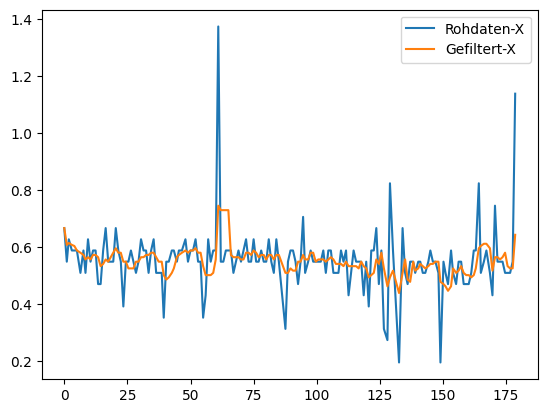

In [31]:
#Plotten der Lösung
fig, ax = plt.subplots()
ax.plot(time, acc_x, label="Rohdaten-X")
ax.plot(time, acc_x_mov5, label="Gefiltert-X")
ax.legend()

## Berechnung des Mean Squared Errors

Der [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) ($MSE$) ist ein Maß für die mittlere quadratische Abweichung zwischen zwei Datensätzen. Er wird berechnet, indem die quadrierten Differenzen zwischen den Werten der beiden Datensätze berechnet und anschließend gemittelt werden.

$MSE = \frac{1}{n} \sum_{i=1}^{n} \left( a_i - a_{\mathrm{filt}_i} \right)^2$

Hierbei ist $a_i$ der Originalwert (z.B.: `acc_x[i]`) und $a_{\mathrm{filt}_i}$ der gefilterte Wert (z.B.: `acc_x_mov5[i]`). $n$ ist die Anzahl der Werte in den Arrays.

Bestimmen Sie auch hier wieder den $MSE$ für die x-, y- und z-Beschleunigung und speichern Sie die Werte in den Variablen `mse_x`, `mse_y` und `mse_z`.

Auch hier zeigt sich wieder, dass die Implementierung mit einer Funktion sinnvoll wäre.

In [32]:
mse_x = 0.0
mse_y = 0.0
mse_z = 0.0

#Lösung hier einfügen:

# Lösung hier einfügen:
mse_sum = 0.0
n = len(acc_x)
for i in range(n):
    mse_sum += (acc_x[i] - acc_x_mov5[i])**2
mse_x = mse_sum / n

mse_sum = 0.0
n = len(acc_y)
for i in range(n):
    mse_sum += (acc_y[i] - acc_y_mov5[i])**2
mse_y = mse_sum / n

mse_sum = 0.0
n = len(acc_z)
for i in range(n):
    mse_sum += (acc_z[i] - acc_z_mov5[i])**2
mse_z = mse_sum / n


In [33]:
#Ausgabe der Lösung
print(f"MSE_x = {mse_x*100:.2f}%")
print(f"MSE_y = {mse_y*100:.2f}%")
print(f"MSE_z = {mse_z*100:.2f}%")

MSE_x = 0.95%
MSE_y = 4.63%
MSE_z = 12.48%


## Plotten der Ergebnisse

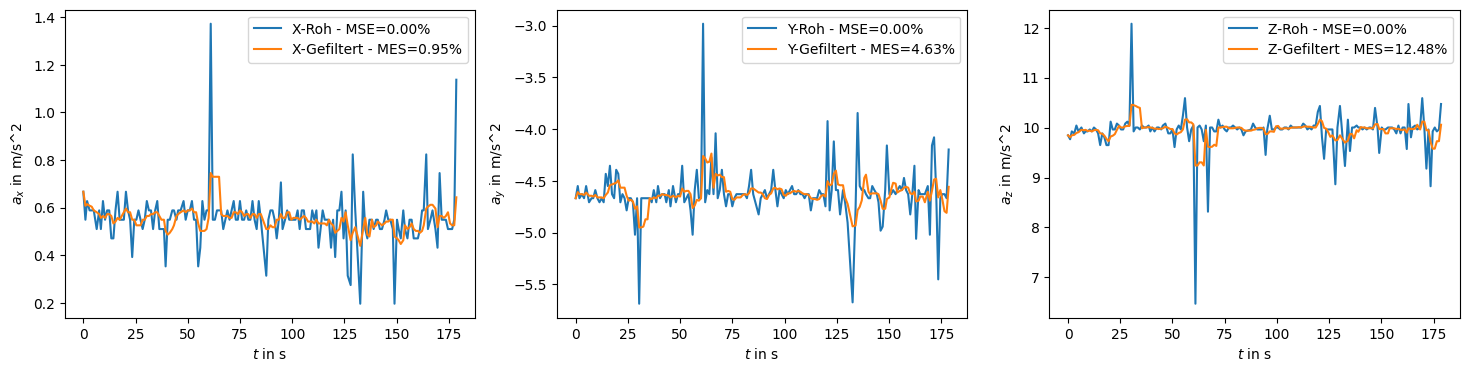

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
ax1.plot(time, acc_x, label="X-Roh - MSE=0.00%")
ax1.plot(time, acc_x_mov5, label=f"X-Gefiltert - MES={mse_x*100:.2f}%")
ax1.set_xlabel("$t$ in s")
ax1.set_ylabel("$a_x$ in m/s^2")
ax1.legend()

ax2.plot(time, acc_y, label="Y-Roh - MSE=0.00%")
ax2.plot(time, acc_y_mov5, label=f"Y-Gefiltert - MES={mse_y*100:.2f}%")
ax2.set_xlabel("$t$ in s")
ax2.set_ylabel("$a_y$ in m/s^2")
ax2.legend()

ax3.plot(time, acc_z, label="Z-Roh - MSE=0.00%")
ax3.plot(time, acc_z_mov5, label=f"Z-Gefiltert - MES={mse_z*100:.2f}%")
ax3.set_xlabel("$t$ in s")
ax3.set_ylabel("$a_z$ in m/s^2")
ax3.legend()